# DataMining - Accidentes de tráfico

In [187]:
import pandas as pd

In [188]:
import numpy as np

In [189]:
#Leemos el csv
datos = pd.read_csv('C:\master\dataset.csv')
datosLE = pd.read_csv('C:\master\dataset.csv')

In [190]:
datos.head()

,GridID,date,Shift,Accident,Longitude.grid,Latitude.grid
0,1,2010-10-08,Night,0,2.08,41.41
1,1,2011-02-16,Morning,0,2.08,41.41
2,1,2014-05-31,Night,0,2.08,41.41
3,1,2011-04-03,Afternoon,0,2.08,41.41
4,1,2013-02-20,Morning,0,2.08,41.41


In [191]:
datos.shape

(824587, 6)

In [192]:
datos.dtypes

GridID              int64
date               object
Shift              object
Accident            int64
Longitude.grid    float64
Latitude.grid     float64
dtype: object

In [193]:
datos['date'] = pd.to_datetime(datos['date'])

In [194]:
datos.dtypes

GridID                     int64
date              datetime64[ns]
Shift                     object
Accident                   int64
Longitude.grid           float64
Latitude.grid            float64
dtype: object

In [195]:
datos["Accident"].value_counts()

0    788070
1     36517
Name: Accident, dtype: int64

In [196]:
datos["Shift"].value_counts()

Afternoon    279847
Morning      277391
Night        267349
Name: Shift, dtype: int64

In [163]:
dummy = pd.get_dummies(datos["Shift"])
dummy.head()

,Afternoon,Morning,Night
0,0,0,1
1,0,1,0
2,0,0,1
3,1,0,0
4,0,1,0


In [164]:
datos = pd.concat([datos, dummy], axis=1)
datos.head()

,GridID,date,Shift,Accident,Longitude.grid,Latitude.grid,Afternoon,Morning,Night
0,1,2010-10-08,Night,0,2.08,41.41,0,0,1
1,1,2011-02-16,Morning,0,2.08,41.41,0,1,0
2,1,2014-05-31,Night,0,2.08,41.41,0,0,1
3,1,2011-04-03,Afternoon,0,2.08,41.41,1,0,0
4,1,2013-02-20,Morning,0,2.08,41.41,0,1,0


In [165]:
datos = datos.drop("Shift", 1)

In [166]:
datos.head()

,GridID,date,Accident,Longitude.grid,Latitude.grid,Afternoon,Morning,Night
0,1,2010-10-08,0,2.08,41.41,0,0,1
1,1,2011-02-16,0,2.08,41.41,0,1,0
2,1,2014-05-31,0,2.08,41.41,0,0,1
3,1,2011-04-03,0,2.08,41.41,1,0,0
4,1,2013-02-20,0,2.08,41.41,0,1,0


In [167]:
from datetime import datetime, date, time, timedelta
import calendar

In [168]:
Week_Day = []
for fecha in datos['date']:
    dia_semana = datetime.weekday(fecha)+1
    Week_Day.append(dia_semana)
    
datos['Week.Day'] = Week_Day
del Week_Day

In [169]:
datos.head()

,GridID,date,Accident,Longitude.grid,Latitude.grid,Afternoon,Morning,Night,Week.Day
0,1,2010-10-08,0,2.08,41.41,0,0,1,5
1,1,2011-02-16,0,2.08,41.41,0,1,0,3
2,1,2014-05-31,0,2.08,41.41,0,0,1,6
3,1,2011-04-03,0,2.08,41.41,1,0,0,7
4,1,2013-02-20,0,2.08,41.41,0,1,0,3


In [170]:
festivos = ('1-1','6-1','19-4','22-4','1-05','10-6','24-6','15-8','11-9','24-9','12-10','1-11','6-12','25-12','26-12')

In [171]:
festive = []
for fecha in datos['date']:
    pasat = False
    for festivo in festivos:
        aux = festivo.split("-")
        aux2 = datetime.strftime(fecha, '%Y-%m-%d').split("-")
        if ( (aux2[1] == aux[1]) and (aux2[2] == aux[0]) and (pasat == False) ):
            festive.append(1)
            pasat = True
    if (pasat == False):
        festive.append(0)

In [172]:
datos['Festive'] = festive
del festive
del festivos

In [173]:
datos['Festive'].value_counts()

0    817881
1      6706
Name: Festive, dtype: int64

In [174]:
datos.head()

,GridID,date,Accident,Longitude.grid,Latitude.grid,Afternoon,Morning,Night,Week.Day,Festive
0,1,2010-10-08,0,2.08,41.41,0,0,1,5,0
1,1,2011-02-16,0,2.08,41.41,0,1,0,3,0
2,1,2014-05-31,0,2.08,41.41,0,0,1,6,0
3,1,2011-04-03,0,2.08,41.41,1,0,0,7,0
4,1,2013-02-20,0,2.08,41.41,0,1,0,3,0


In [175]:
weekend = []
for dia in datos['Week.Day']:
    if dia > 5:
        weekend.append(1)
    else:
        weekend.append(0)
    
datos['Weekend'] = weekend
del weekend

In [176]:
datos['Weekend'].value_counts()

0    591925
1    232662
Name: Weekend, dtype: int64

In [177]:
datos.head()

,GridID,date,Accident,Longitude.grid,Latitude.grid,Afternoon,Morning,Night,Week.Day,Festive,Weekend
0,1,2010-10-08,0,2.08,41.41,0,0,1,5,0,0
1,1,2011-02-16,0,2.08,41.41,0,1,0,3,0,0
2,1,2014-05-31,0,2.08,41.41,0,0,1,6,0,1
3,1,2011-04-03,0,2.08,41.41,1,0,0,7,0,1
4,1,2013-02-20,0,2.08,41.41,0,1,0,3,0,0


# Árbol decisiones

In [105]:
X = datos.drop("Accident",1)
X = X.drop("date",1)

In [106]:
y = datos["Accident"]

In [107]:
print(X.shape)
print(y.shape)

(824587, 9)
(824587,)


In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=1)

In [109]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(577210, 9)
(247377, 9)
(577210,)
(247377,)


In [110]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [111]:
DTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [112]:
y_train_pred = DTC.predict_proba(X_train)

In [113]:
from sklearn.metrics import roc_auc_score

In [114]:
print(roc_auc_score(y_train, y_train_pred[:, 1]), "Árbol de decisión - Datos de entrenamiento")

0.8846932383960083 Árbol de decisión - Datos de entrenamiento


In [115]:
y_test_pred = DTC.predict_proba(X_test)

In [116]:
print(roc_auc_score(y_test, y_test_pred[:, 1]), "Árbol de decisión - Datos de test")

0.7319214775738814 Árbol de decisión - Datos de test


# Arboles de decision Validación Cruzada

In [117]:
from sklearn.model_selection import cross_val_score

In [128]:
print(cross_val_score(DTC, X_train, y_train, cv=5, scoring='roc_auc'))

[0.71835306 0.71559596 0.72050872 0.71561632 0.72097091]


In [129]:
print(roc_auc_score(y_train, y_train_pred[:, 1]), "Árbol de decisión - Datos de entrenamiento")

0.8846932383960083 Árbol de decisión - Datos de entrenamiento


In [130]:
print(cross_val_score(DTC, X_train, y_train, cv=5, scoring='roc_auc').mean(), "Árbol de decisión - Datos de validación")

0.7182089934631197 Árbol de decisión - Datos de validación


In [131]:
DTC.tree_.max_depth

38

# Sobreajuste

In [132]:
import matplotlib.pyplot as plt

In [133]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

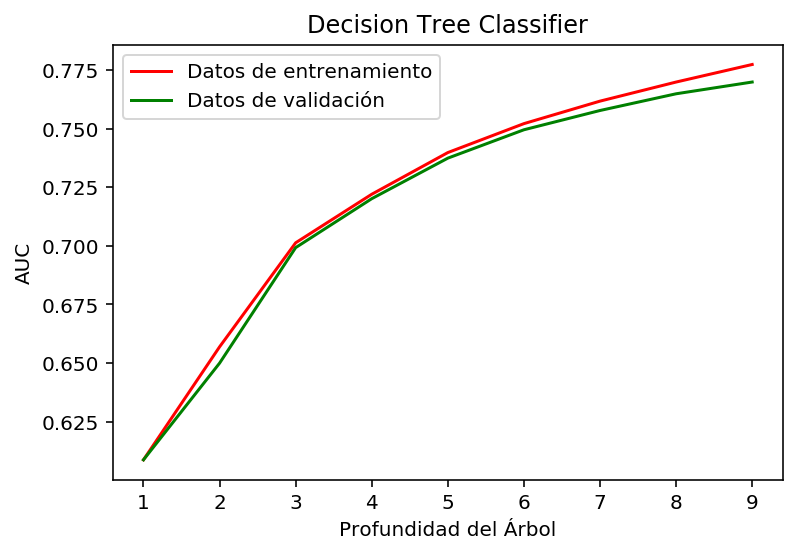

In [135]:
train_scores = []
val_scores = []
max_deep_list = list(range(1, 10))
for c in max_deep_list:
    DTC = DecisionTreeClassifier(max_depth=c, criterion='entropy', random_state=1)
    DTC.fit(X_train, y_train)
    y_train_pred = DTC.predict_proba(X_train)
    train_scores.append(roc_auc_score(y_train, y_train_pred[:, 1]))
    val_scores.append(cross_val_score(DTC, X_train, y_train, cv=5, scoring='roc_auc').mean())
    
plt.plot(max_deep_list, train_scores, color='r', label='Datos de entrenamiento')
plt.plot(max_deep_list, val_scores, color='g', label='Datos de validación')
plt.title('Decision Tree Classifier')
plt.legend()
plt.ylabel('AUC')
plt.xlabel('Profundidad del Árbol')
plt.show()

In [136]:
DTC = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=1)
DTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [137]:
y_train_pred = DTC.predict_proba(X_train)
print(roc_auc_score(y_train, y_train_pred[:, 1]), "Árbol de decisión - Datos de entrenamiento")

0.7012712238337478 Árbol de decisión - Datos de entrenamiento


In [138]:
y_test_pred = DTC.predict_proba(X_test)
print(roc_auc_score(y_test, y_test_pred[:, 1]), "Árbol de decisión - Datos de test")

0.7004399234269616 Árbol de decisión - Datos de test


# RandomSearch

In [183]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [184]:
DTC = DecisionTreeClassifier(random_state=1)

In [185]:
parametros = dict(max_depth=[1,2,3,4,5,6,7,8,9,10,20,30,40,50], min_samples_leaf=[1,2,3,4,5,6,7,8,9,10,20,30,40,50])
RS = RandomizedSearchCV(DTR, param_distributions=parametros, n_iter=100, cv=5, n_jobs=-1, verbose=1, random_state=1)

In [186]:
RS.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.3min


KeyboardInterrupt: 

In [ ]:
RS.best_score_

In [ ]:
RS.best_params_

# LabelEncoder Shift

In [197]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit(datosLE["Shift"])

LabelEncoder()

In [198]:
list(LE.classes_)
datosLE["Shift"] = LE.transform(datosLE["Shift"])
datosLE["Shift"].value_counts()

0    279847
1    277391
2    267349
Name: Shift, dtype: int64

In [199]:
datosLE.head()

,GridID,date,Shift,Accident,Longitude.grid,Latitude.grid
0,1,2010-10-08,2,0,2.08,41.41
1,1,2011-02-16,1,0,2.08,41.41
2,1,2014-05-31,2,0,2.08,41.41
3,1,2011-04-03,0,0,2.08,41.41
4,1,2013-02-20,1,0,2.08,41.41


# Árbol decisiones - Label Encoder Shift

In [210]:
X = datosLE.drop("Accident",1)
X = X.drop("date",1)

In [211]:
y = datosLE["Accident"]

In [212]:
print(X.shape)
print(y.shape)

(824587, 4)
(824587,)


In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=1)

In [214]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(577210, 4)
(247377, 4)
(577210,)
(247377,)


In [215]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [216]:
DTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [217]:
y_train_pred = DTC.predict_proba(X_train)

In [218]:
from sklearn.metrics import roc_auc_score

In [219]:
print(roc_auc_score(y_train, y_train_pred[:, 1]), "Árbol de decisión - Datos de entrenamiento")

0.8213526334477538 Árbol de decisión - Datos de entrenamiento


In [220]:
y_test_pred = DTC.predict_proba(X_test)

In [221]:
print(roc_auc_score(y_test, y_test_pred[:, 1]), "Árbol de decisión - Datos de test")

0.7923023419575098 Árbol de decisión - Datos de test


#Obtenemos mejor resultado en TEST con Shift como labelEncoder, no realizaremos mas pruebas con sobreajustes, añadimos datos de meteorologia para ver si mejoramos el modelo.

# DataSet Climatologia

In [347]:
clima = pd.read_csv('C:\master\datosclima.csv')

In [348]:
clima.head()

,FECHA,Precipitacion,Maxima,Minima,Media
0,01-01-2010,0.0,13.8,10.0,11.90
1,02-01-2010,0.0,11.9,8.6,10.25
2,03-01-2010,0.1,14.2,8.4,11.30
3,04-01-2010,15.0,12.2,9.3,10.75
4,05-01-2010,2.2,12.3,9.7,11.00


In [349]:
clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 5 columns):
FECHA            1752 non-null object
Precipitacion    1752 non-null float64
Maxima           1752 non-null float64
Minima           1752 non-null float64
Media            1752 non-null float64
dtypes: float64(4), object(1)
memory usage: 68.5+ KB


In [351]:
clima['FECHA'] = pd.to_datetime(clima['FECHA'])

In [360]:
clima.dtypes

FECHA            datetime64[ns]
Precipitacion           float64
Maxima                  float64
Minima                  float64
Media                   float64
dtype: object

In [396]:
df=pd.DataFrame(clima)
df.head()
data=df[df["FECHA"] == '05-01-2010']
print(data)
data=df[0:1]
print(data)


       FECHA  Precipitacion  Maxima  Minima  Media
4 2010-05-01            2.2    12.3     9.7   11.0
       FECHA  Precipitacion  Maxima  Minima  Media
0 2010-01-01            0.0    13.8    10.0   11.9


In [ ]:
rain = []
for fecha in datos['date']:
    data = clima[clima["FECHA"] == datetime.strftime(fecha, '%Y-%m-%d')]
    rain.append(data["Precipitacion"])
    
len(rain)


In [393]:
datos["rain"] = rain

In [394]:
datos.head()

,GridID,date,Shift,Accident,Longitude.grid,Latitude.grid,rain
0,1,2010-10-08,Night,0,2.08,41.41,"208 0.0 Name: Precipitacion, dtype: float64"
1,1,2011-02-16,Morning,0,2.08,41.41,"393 0.8 Name: Precipitacion, dtype: float64"
2,1,2014-05-31,Night,0,2.08,41.41,"1537 0.0 Name: Precipitacion, dtype: float64"
3,1,2011-04-03,Afternoon,0,2.08,41.41,"409 0.0 Name: Precipitacion, dtype: float64"
4,1,2013-02-20,Morning,0,2.08,41.41,"1075 0.0 Name: Precipitacion, dtype: float64"


In [357]:
print("Datos",len(datos))
print("Clima",len(clima))

Datos 824587
Clima 1752


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE = LabelEncoder()
LE.fit(clima["Lluvia"])

In [ ]:
list(LE.classes_)

In [ ]:
clima["Lluvia"] = LE.transform(clima["Lluvia"])

In [ ]:
clima["Lluvia"].value_counts()

In [ ]:
clima = clima.drop("Precipitacion",1)
clima.head()

In [ ]:
aux = []
for prep in clima["Precipitacion"]:
    if ( prep == 0 ):
        aux.append("ausente")
    if ( prep > 0 and prep < 2 ): 
        aux.append("debil")
    if ( prep >= 2 and prep < 15 ): 
        aux.append("moderada")
    if ( prep >=15 ): 
        aux.append("fuerte")

clima["Lluvia"] = aux